<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1017/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 統計需要資料量:
# ML: 1k以上  DL: 1w以上
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
# 處理資料: pandas -> DataFrame
# 進到sklearn: numpy -> array
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [17]:
# axis!!!!
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


In [31]:
train_test_split([1, 2, 3, 4],
        [5, 6, 7, 8],
        test_size=0.25)

[[2, 4, 1], [3], [6, 8, 5], [7]]

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [43, 44, 48]\nclass = virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 92\nvalue = [0, 44, 48]\nclass = virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.187\nsamples = 48\nvalue = [0, 43, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461

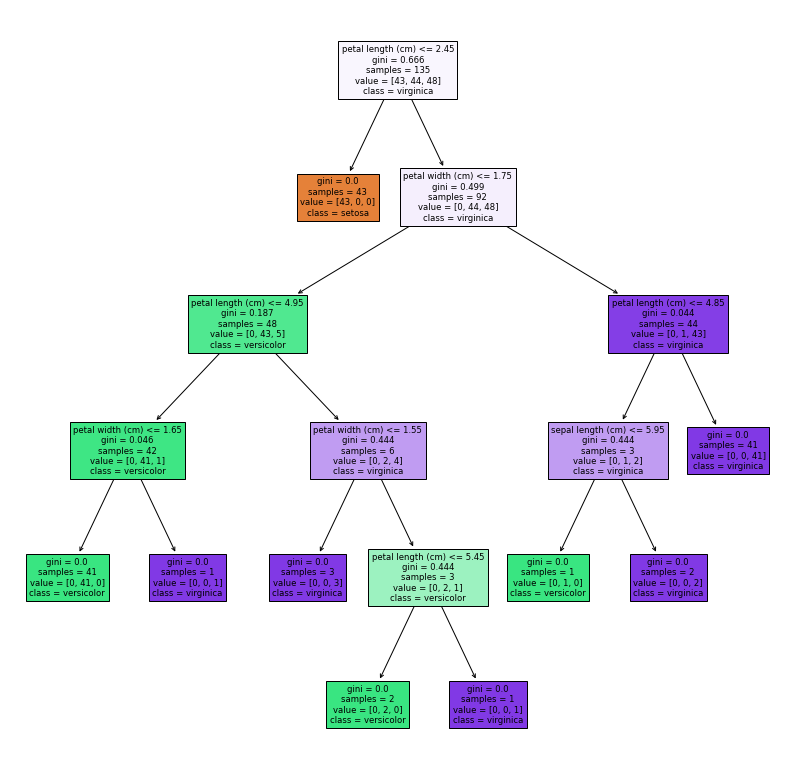

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=iris["feature_names"], 
     filled=True,
     class_names=iris["target_names"])